https://towardsdatascience.com/avatar-meets-data-visualization-60631f86ba7d

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from datetime import datetime
import matplotlib.pyplot as plt

In [31]:
#loads both sodapoppin and xqcow chat datasets and combines them
def load_data():
    sodapoppin = pd.read_csv("sodapoppin.csv")
    sodapoppin["Streamer"] = "sodapoppin"
    
    xqcow = pd.read_csv("xqcow.csv")
    xqcow["Streamer"] = "xqcow"
    
    merged_chats = pd.concat([sodapoppin,xqcow])
    
    return merged_chats

In [32]:
load_data().head()

,Message_Datetime,Name,Moderator,VIP,Subscriber,Is_First_Message,Message_len,qtd_msgs_15_secs,Message,Banned,Streamer
0,44548.058067,Mhepps,0,0,0,0,42,1,"i just woke up, where is mr strimmer Madge",0,sodapoppin
1,44548.058148,Pispet,0,0,1,0,53,1,maarionete the weebs are being horni again Cal...,0,sodapoppin
2,44548.058218,Maarionete,0,0,0,0,10,1,PANIC webs,0,sodapoppin
3,44548.058322,justTNK,0,0,1,0,24,1,squchaGasm Kiss me mario,0,sodapoppin
4,44548.058391,Maarionete,0,0,0,0,11,2,vulpes3Kiss,0,sodapoppin


In [85]:
# calculating and adding sentiment score to dataframe
def sentiment_scores(df):
    
    merged_chats= df.astype({'Message': 'str'})
    senti_lyze = SentimentIntensityAnalyzer()
    merged_chats.reset_index(inplace=True, drop=True)
    merged_chats[['neg', 'neu', 'pos', 'compound']] = merged_chats['Message'].apply(senti_lyze.polarity_scores).apply(pd.Series)
    
    return merged_chats

In [ ]:
start_time = datetime.now()
chat_df = sentiment_scores(load_data())
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
print("Finished adding sentiment scores")

In [36]:
chat_df.head()

,Message_Datetime,Name,Moderator,VIP,Subscriber,Is_First_Message,Message_len,qtd_msgs_15_secs,Message,Banned,Streamer,neg,neu,pos,compound
0,44548.058067,Mhepps,0,0,0,0,42,1,"i just woke up, where is mr strimmer Madge",0,sodapoppin,0.000,1.000,0.000,0.0000
1,44548.058148,Pispet,0,0,1,0,53,1,maarionete the weebs are being horni again Cal...,0,sodapoppin,0.000,1.000,0.000,0.0000
2,44548.058218,Maarionete,0,0,0,0,10,1,PANIC webs,0,sodapoppin,0.801,0.199,0.000,-0.6166
3,44548.058322,justTNK,0,0,1,0,24,1,squchaGasm Kiss me mario,0,sodapoppin,0.000,0.517,0.483,0.4215
4,44548.058391,Maarionete,0,0,0,0,11,2,vulpes3Kiss,0,sodapoppin,0.000,1.000,0.000,0.0000


In [105]:
#Gets a sample of the dataframe, sample of both streamers
#Example: passing sample_size=100 will return df with 100 rows of sodapoppin and 100 xqcow data points (200 total)
def get_sample(df,sample_size):
        
    #drops all rows where neutral is 1 to remove some of the noise
    df = df[df["neu"]!=1]
    
    soda_df = df[df["Streamer"]=="sodapoppin"]
    xqcow_df = df[df["Streamer"]=="xqcow"]
    
    #gets a random sample of the dataframe based on passed n from both streamers chats
    
    soda_df = df[df["Streamer"]=="sodapoppin"]
    xqcow_df = df[df["Streamer"]=="xqcow"]
    
    soda_df_sample = soda_df[:sample_size]
    soda_df_sample = soda_df_sample.sample(n=sample_size, random_state=1)
    
    xqcow_df_sample = xqcow_df[:sample_size]
    xqcow_df_sample = xqcow_df_sample.sample(n=sample_size, random_state=1)
    
    merged_samples = pd.concat([xqcow_df_sample,soda_df_sample])
    
    return merged_samples 

In [106]:
def sentiment_dist(df):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    #create array for x axis
    n = len(df['pos'])
    X = np.arange(n)

    #bar plot
    fig = plt.figure()
    plt.barh(X, df['pos'])
    plt.barh(X, -df['neg'])
    
    #plt.rcParams.update({'font.size':13})
    #plt.xlim([-.16,.22])
    #plt.yticks(ticks=X, labels=df['Streamer'], rotation='0')
    
    plt.xlabel('Sentiment Score')
    plt.ylabel('Sample_n')
    plt.title("Distribution of Sentiment Scores")

In [107]:
sample = get_sample(chat_df,1000)

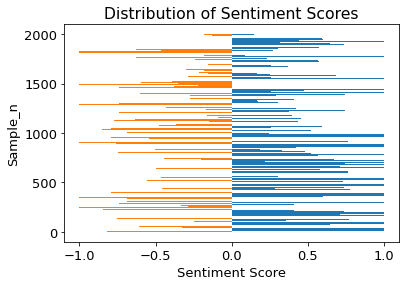

In [108]:
sentiment_dist(sample)

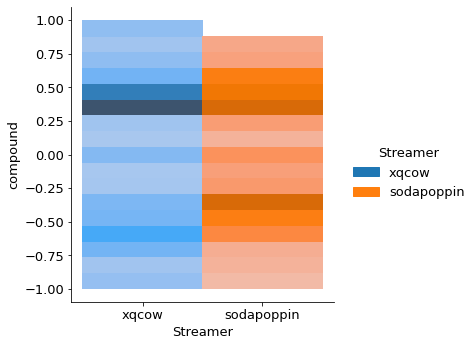

In [116]:
sns.displot(sample, y="compound", x="Streamer",hue="Streamer")

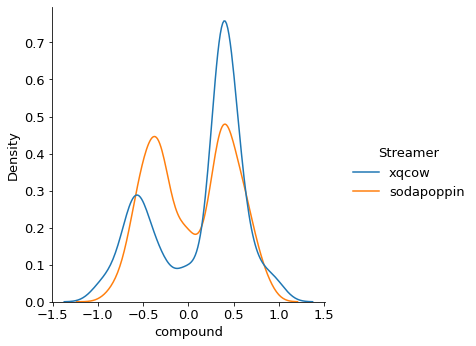

In [120]:
sns.displot(sample, x="compound", hue="Streamer", kind="kde")

In [ ]:
#with open("Output.txt", "w") as text_file:
#    text_file.write("Purchase Amount: {0}".format(TotalAmount))

In [ ]:

#import stylecloud
#from wordcloud import STOPWORDS

#my_custom_stopwords = character_names | STOPWORDS
#stylecloud.gen_stylecloud(earth_text, palette="cmocean.sequential.Matter_16", 
#                          background_color="white", icon_name= 'fas fa-tint',
#                          colors=['#3A7FC4', '#3A7FC4', '#3A7FC4'], stopwords=STOPWORDS,
#                          custom_stopwords = my_custom_stopwords, collocations=False)